In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import numpy as np
import scipy as sp

In [2]:
df = xr.open_dataset('C:/Users/eirik/Master/Data/VerticalSection72_6.nc')
dfU = xr.open_dataset('C:/Users/eirik/Master/Data/U_interp.nc')
dfV = xr.open_dataset('C:/Users/eirik/Master/Data/V_interp.nc')
display(df)

<xarray.Dataset>
Dimensions:    (Z: 216, Zp1: 217, Zu: 216, Zl: 216, X: 435, Y: 1, Xp1: 436,
                Yp1: 2, time: 1460, time_midp: 1459)
Coordinates: (12/18)
  * Z          (Z) float64 -1.0 -3.5 -7.0 ... -3.904e+03 -3.922e+03 -3.942e+03
  * Zp1        (Zp1) float64 0.0 -2.0 -5.0 ... -3.913e+03 -3.932e+03 -3.951e+03
  * Zu         (Zu) float64 -2.0 -5.0 -9.0 ... -3.913e+03 -3.932e+03 -3.951e+03
  * Zl         (Zl) float64 0.0 -2.0 -5.0 ... -3.894e+03 -3.913e+03 -3.932e+03
  * X          (X) float64 -19.97 -19.92 -19.87 ... -0.1493 -0.09658 -0.04373
  * Y          (Y) float64 72.59
    ...         ...
  * time       (time) datetime64[ns] 2017-09-01 ... 2018-08-31T18:00:00
    YU         (Y, Xp1) float64 ...
    XU         (Y, Xp1) float64 ...
    YV         (Yp1, X) float64 ...
    XV         (Yp1, X) float64 ...
  * time_midp  (time_midp) datetime64[ns] 2017-09-01T03:00:00 ... 2018-08-31T...
Data variables:
    Depth      (Y, X) float64 ...
    V          (time, Z, Yp1, X) float64 ...
    Temp       (time, Z, Y, X) float64 ...
    S          (time, Z, Y, X) float64 ...
    Eta        (time, Y, X) float64 ...
    EKE        (time, Z, Y, X) float64 ...
Attributes: (12/24)
    MITgcm_version:          checkpoint67l
    build_user:              malmans2@jhu.edu
    build_host:              compute0673
    build_date:              Fri Nov  8 01:36:45 EST 2019
    MITgcm_URL:              http://mitgcm.org
    MITgcm_tag_id:           
    ...                      ...
    OceanSpy_parameters:     {'rSphere': 6371.0, 'eq_state': 'mdjwf', 'rho0':...
    OceanSpy_name:           IGPyearlong
    OceanSpy_description:    High-resolution numerical simulation carried out...
    OceanSpy_projection:     Mercator(**{})
    OceanSpy_grid_coords:    {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': None, ...
    OceanSpy_grid_periodic:  []

In [3]:
S = df['S'].sel(Y=72.6,method='nearest')
S_3Month = S.resample(time='3ME').mean(dim='time')
S_Mean = S.mean(dim='time')
display(S.Y)

<xarray.DataArray 'Y' ()>
array(72.58998644)
Coordinates:
    Y        float64 72.59
Attributes:
    long_name:  latitude of cell center
    units:      degrees_north

In [4]:
display(S_3Month.time.values)

array(['2017-09-30T00:00:00.000000000', '2017-12-31T00:00:00.000000000',
       '2018-03-31T00:00:00.000000000', '2018-06-30T00:00:00.000000000',
       '2018-09-30T00:00:00.000000000'], dtype='datetime64[ns]')

Text(0.5, 0.98, 'Salinity')

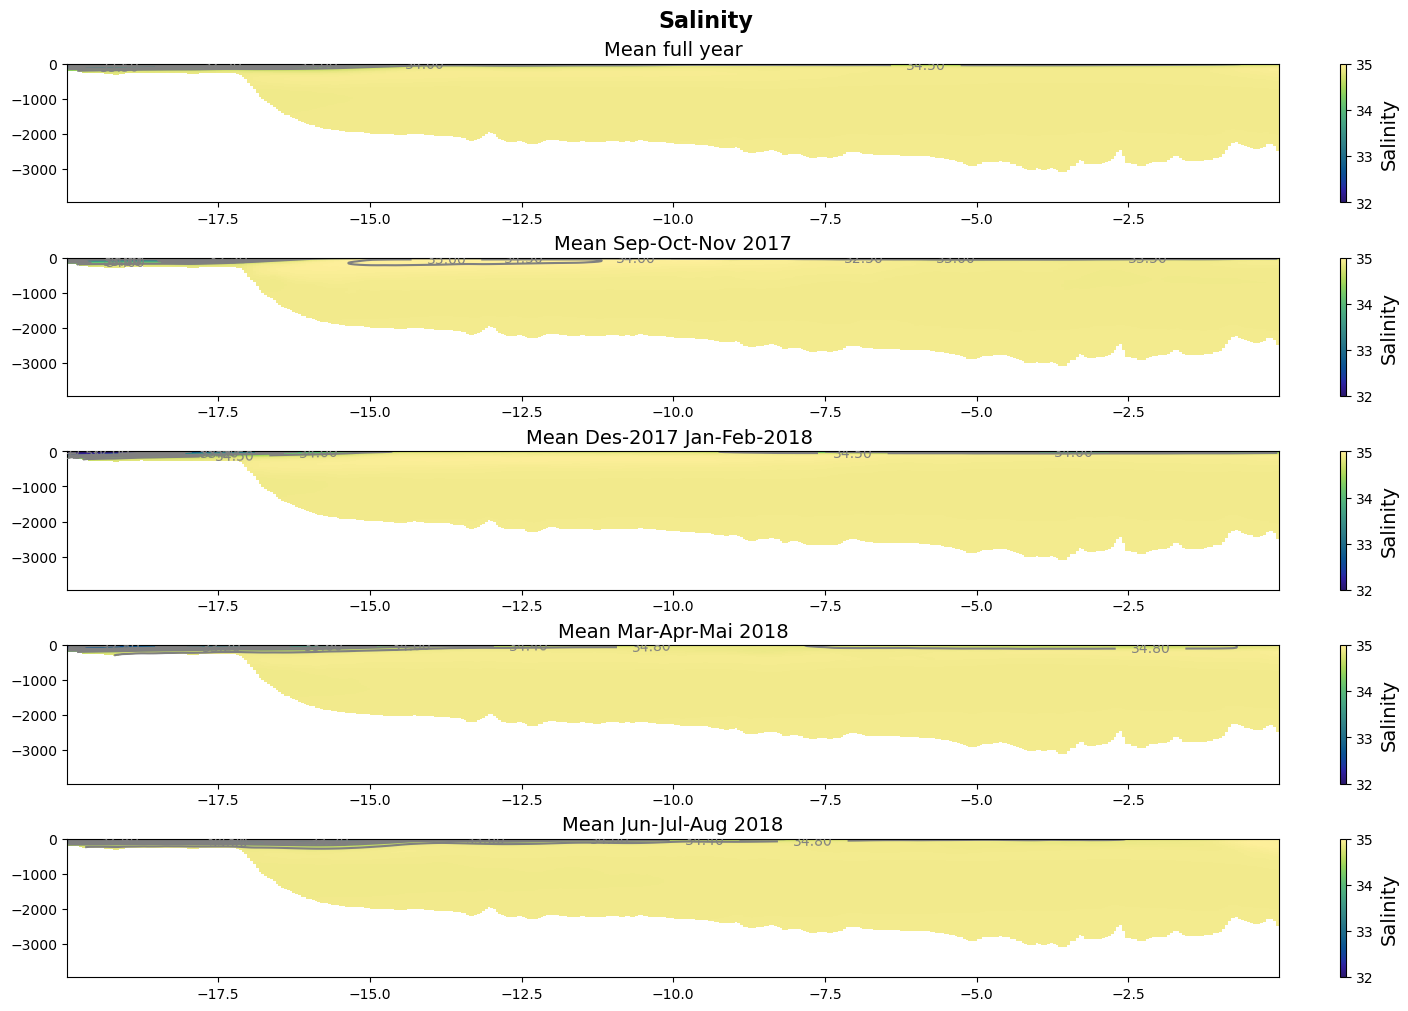

In [5]:
data3M = S_3Month
dataM = S_Mean
cmap = cmo.haline
Name = 'Salinity'
vmin = 32
vmax = 35

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(14,10),layout='constrained')

# Mean full year
mesh1 = ax1.pcolormesh(dataM.X,dataM.Z,dataM,cmap=cmap,vmin=vmin,vmax=vmax)
cbar1 = fig.colorbar(mesh1)
cbar1.set_label('Salinity',fontsize=14)
cntr = ax1.contour(dataM.X,dataM.Z,dataM,colors='grey')
ax1.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax1.set_title('Mean full year',fontsize=14)

# Sep-Oct-Nov
mesh2 = ax2.pcolormesh(data3M.X,data3M.Z,data3M[0],cmap=cmap,vmin=vmin,vmax=vmax)
cbar2 = fig.colorbar(mesh2)
cbar2.set_label('Salinity',fontsize=14)
cntr = ax2.contour(data3M.X,data3M.Z,data3M[0],colors='grey')
ax2.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax2.set_title('Mean Sep-Oct-Nov 2017',fontsize=14)

# Des-Jan-Feb
mesh3 = ax3.pcolormesh(data3M.X,data3M.Z,data3M[1],cmap=cmap,vmin=vmin,vmax=vmax)
cbar3 = fig.colorbar(mesh3)
cbar3.set_label('Salinity',fontsize=14)
cntr = ax3.contour(data3M.X,data3M.Z,data3M[1],colors='grey')
ax3.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax3.set_title('Mean Des-2017 Jan-Feb-2018 ',fontsize=14)

# Mar-Apr-Mai
mesh4 = ax4.pcolormesh(data3M.X,data3M.Z,data3M[2],cmap=cmap,vmin=vmin,vmax=vmax)
cbar4 = fig.colorbar(mesh4)
cbar4.set_label('Salinity',fontsize=14)
cntr = ax4.contour(data3M.X,data3M.Z,data3M[2],colors='grey')
ax4.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax4.set_title('Mean Mar-Apr-Mai 2018',fontsize=14)

# Jun-Jul-Aug
mesh5 = ax5.pcolormesh(data3M.X,data3M.Z,data3M[3],cmap=cmap,vmin=vmin,vmax=vmax)
cbar5 = fig.colorbar(mesh5)
cbar5.set_label('Salinity',fontsize=14)
cntr = ax5.contour(data3M.X,data3M.Z,data3M[3],colors='grey')
ax5.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax5.set_title('Mean Jun-Jul-Aug 2018',fontsize=14)

fig.suptitle(Name,fontweight='bold',fontsize=16)

In [6]:
def vertical_plot_3M_M(data3M=xr.Dataset,dataM=xr.Dataset,cmap=cmap,plotName=str(),fileName=str(),vmin=None,vmax=None,cbarName=str(),interpCoords=False,set_depth=None,addcontour=False):
    """
    Plotting the choosen values for each 3M period with first plot displaying the mean.\n
    The layout is specificly created for the full year run of the IGP dataset.\n
    \n
    data3M: Resampled data with three month mean\n
    dataM: Mean of dataset with dim='time'
    """
    if set_depth:
        if set_depth >0 or type(set_depth) != int:
            print(ValueError('set_depth > 0 is given, depth should be a negative value and int'))
    if interpCoords:
        fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(14,15),layout='constrained')

        # Mean full year
        mesh1 = ax1.pcolormesh(dataM.Xp1,dataM.Z,dataM,cmap=cmap,vmin=vmin,vmax=vmax)
        cbar1 = fig.colorbar(mesh1)
        cbar1.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax1.contour(dataM.Xp1,dataM.Z,dataM,colors='grey')
            ax1.clabel(cntr,fmt="%2.2f",use_clabeltext=True)

        ax1.set_title('Mean full year',fontsize=14)
        ax1.set_ylim(set_depth,0)

        # Sep-Oct-Nov
        mesh2 = ax2.pcolormesh(data3M.Xp1,data3M.Z,data3M[0],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar2 = fig.colorbar(mesh2)
        cbar2.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax2.contour(data3M.Xp1,data3M.Z,data3M[0],colors='grey')
            ax2.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
        
        ax2.set_title('Mean Sep-Oct-Nov 2017',fontsize=14)
        ax2.set_ylim(set_depth,0)

        # Des-Jan-Feb
        mesh3 = ax3.pcolormesh(data3M.Xp1,data3M.Z,data3M[1],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar3 = fig.colorbar(mesh3)
        cbar3.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax3.contour(data3M.Xp1,data3M.Z,data3M[1],colors='grey')
            ax3.clabel(cntr,fmt="%2.2f",use_clabeltext=True)

        ax3.set_title('Mean Des-2017 Jan-Feb-2018 ',fontsize=14)
        ax3.set_ylim(set_depth,0)

        # Mar-Apr-Mai
        mesh4 = ax4.pcolormesh(data3M.Xp1,data3M.Z,data3M[2],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar4 = fig.colorbar(mesh4)
        cbar4.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax4.contour(data3M.Xp1,data3M.Z,data3M[2],colors='grey')
            ax4.clabel(cntr,fmt="%2.2f",use_clabeltext=True)

        ax4.set_title('Mean Mar-Apr-Mai 2018',fontsize=14)
        ax4.set_ylim(set_depth,0)

        # Jun-Jul-Aug
        mesh5 = ax5.pcolormesh(data3M.Xp1,data3M.Z,data3M[3],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar5 = fig.colorbar(mesh5)
        cbar5.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax5.contour(data3M.Xp1,data3M.Z,data3M[3],colors='grey')
            ax5.clabel(cntr,fmt="%2.2f",use_clabeltext=True)

        ax5.set_title('Mean Jun-Jul-Aug 2018',fontsize=14)
        ax5.set_ylim(set_depth,0)

        fig.suptitle(plotName,fontweight='bold',fontsize=16)
        plt.savefig(f'C:/Users/eirik/Master/Figures/{fileName}')

    else:
        fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(14,15),layout='constrained')

        # Mean full year
        mesh1 = ax1.pcolormesh(dataM.X,dataM.Z,dataM,cmap=cmap,vmin=vmin,vmax=vmax)
        cbar1 = fig.colorbar(mesh1)
        cbar1.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax1.contour(dataM.X,dataM.Z,dataM,colors='grey')
            ax1.clabel(cntr,fmt="%2.2f",use_clabeltext=True)

        ax1.set_title('Mean full year',fontsize=14)
        ax1.set_ylim(set_depth,0)

        # Sep-Oct-Nov
        mesh2 = ax2.pcolormesh(data3M.X,data3M.Z,data3M[0],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar2 = fig.colorbar(mesh2)
        cbar2.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax2.contour(data3M.X,data3M.Z,data3M[0],colors='grey')
            ax2.clabel(cntr,fmt="%2.2f",use_clabeltext=True)

        ax2.set_title('Mean Sep-Oct-Nov 2017',fontsize=14)
        ax2.set_ylim(set_depth,0)

        # Des-Jan-Feb
        mesh3 = ax3.pcolormesh(data3M.X,data3M.Z,data3M[1],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar3 = fig.colorbar(mesh3)
        cbar3.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax3.contour(data3M.X,data3M.Z,data3M[1],colors='grey')
            ax3.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
        
        ax3.set_title('Mean Des-2017 Jan-Feb-2018 ',fontsize=14)
        ax3.set_ylim(set_depth,0)

        # Mar-Apr-Mai
        mesh4 = ax4.pcolormesh(data3M.X,data3M.Z,data3M[2],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar4 = fig.colorbar(mesh4)
        cbar4.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax4.contour(data3M.X,data3M.Z,data3M[2],colors='grey')
            ax4.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
        
        ax4.set_title('Mean Mar-Apr-Mai 2018',fontsize=14)
        ax4.set_ylim(set_depth,0)

        # Jun-Jul-Aug
        mesh5 = ax5.pcolormesh(data3M.X,data3M.Z,data3M[3],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar5 = fig.colorbar(mesh5)
        cbar5.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax5.contour(data3M.X,data3M.Z,data3M[3],colors='grey')
            ax5.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
        
        ax5.set_title('Mean Jun-Jul-Aug 2018',fontsize=14)
        ax5.set_ylim(set_depth,0)

        fig.suptitle(plotName,fontweight='bold',fontsize=16)
        plt.savefig(f'C:/Users/eirik/Master/Figures/{fileName}')

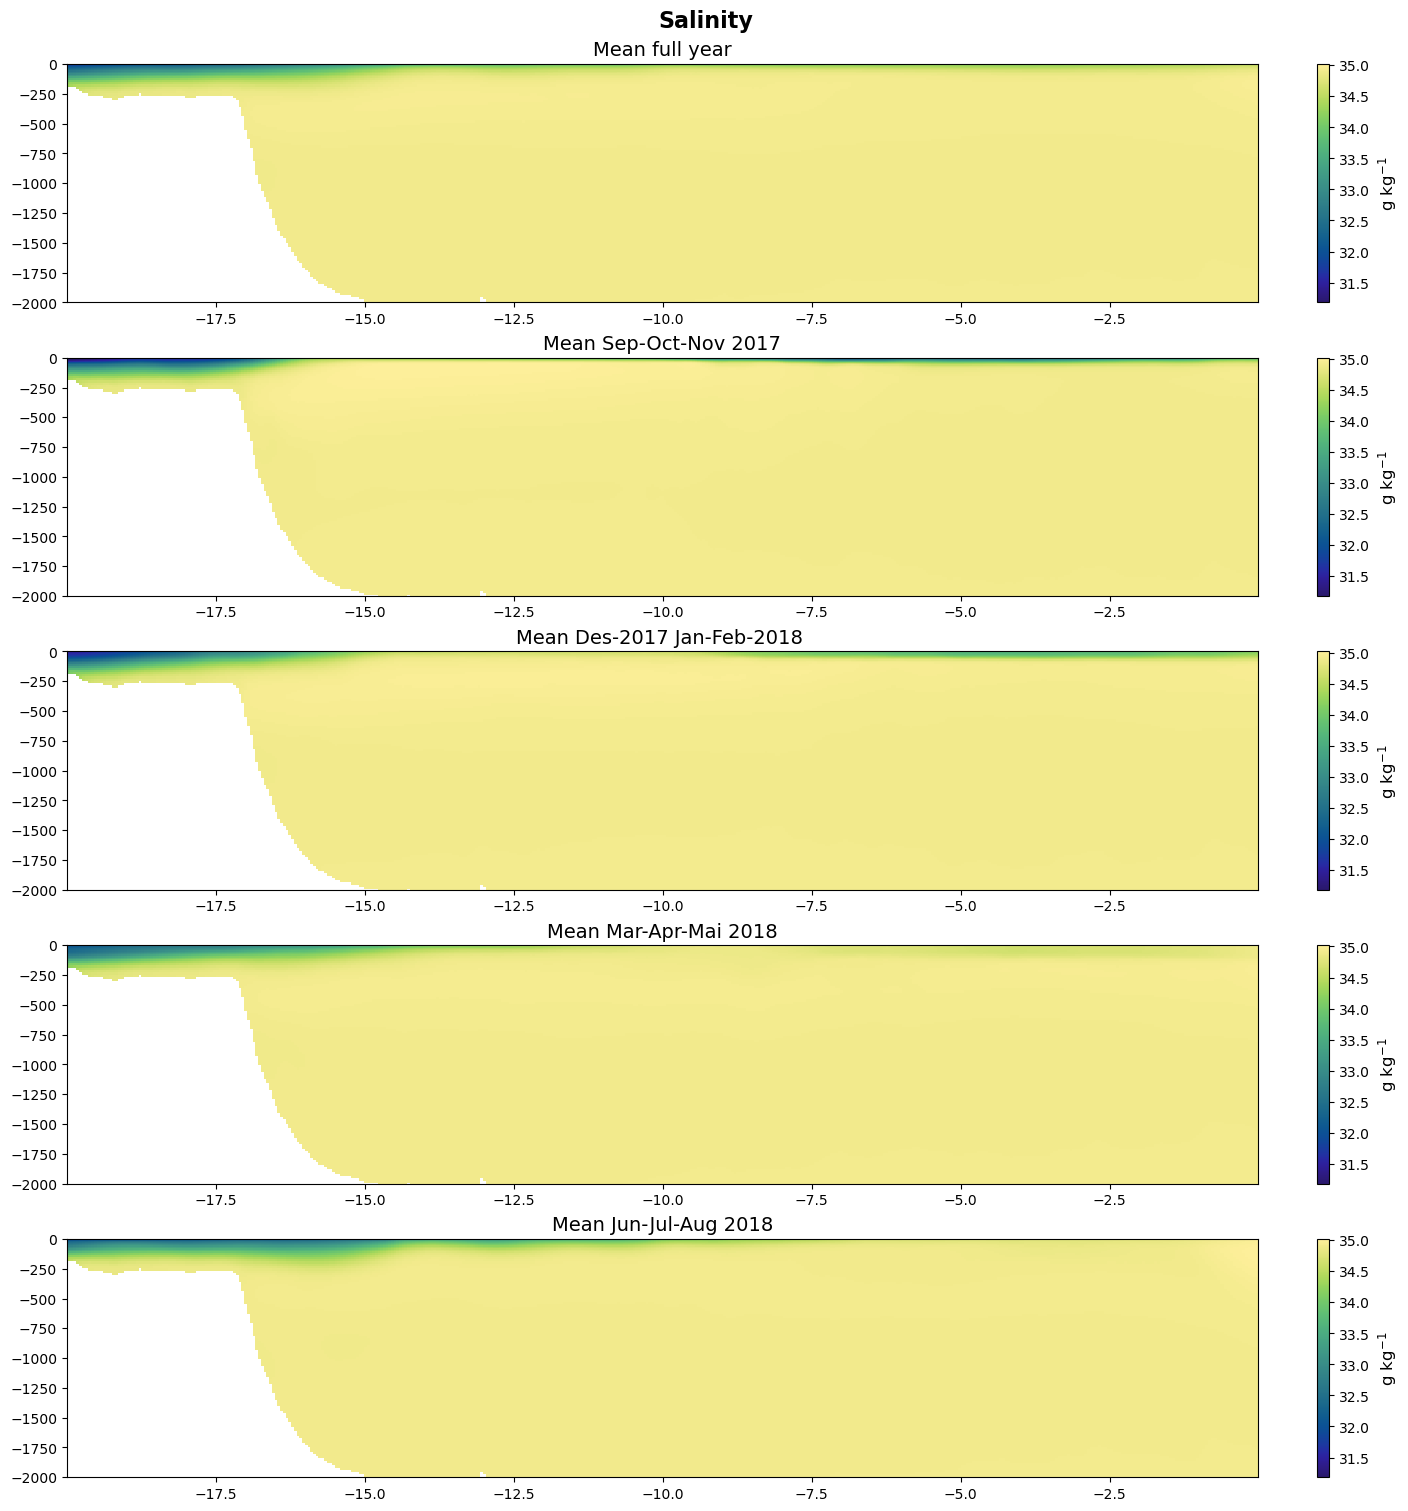

In [7]:
vertical_plot_3M_M(S_3Month,S_Mean,cmo.haline,'Salinity','Salinity3MYear',vmin=np.min(S_3Month),vmax=np.max(S_3Month),cbarName='g kg$^{-1}$',set_depth=-2000)

In [54]:
T = df['Temp'].sel(Y=72.6,method='nearest')
T_3Month = T.resample(time='3ME').mean(dim='time')
T_Mean = T.mean(dim='time')

ValueError: not enough values to unpack (expected 2, got 0)

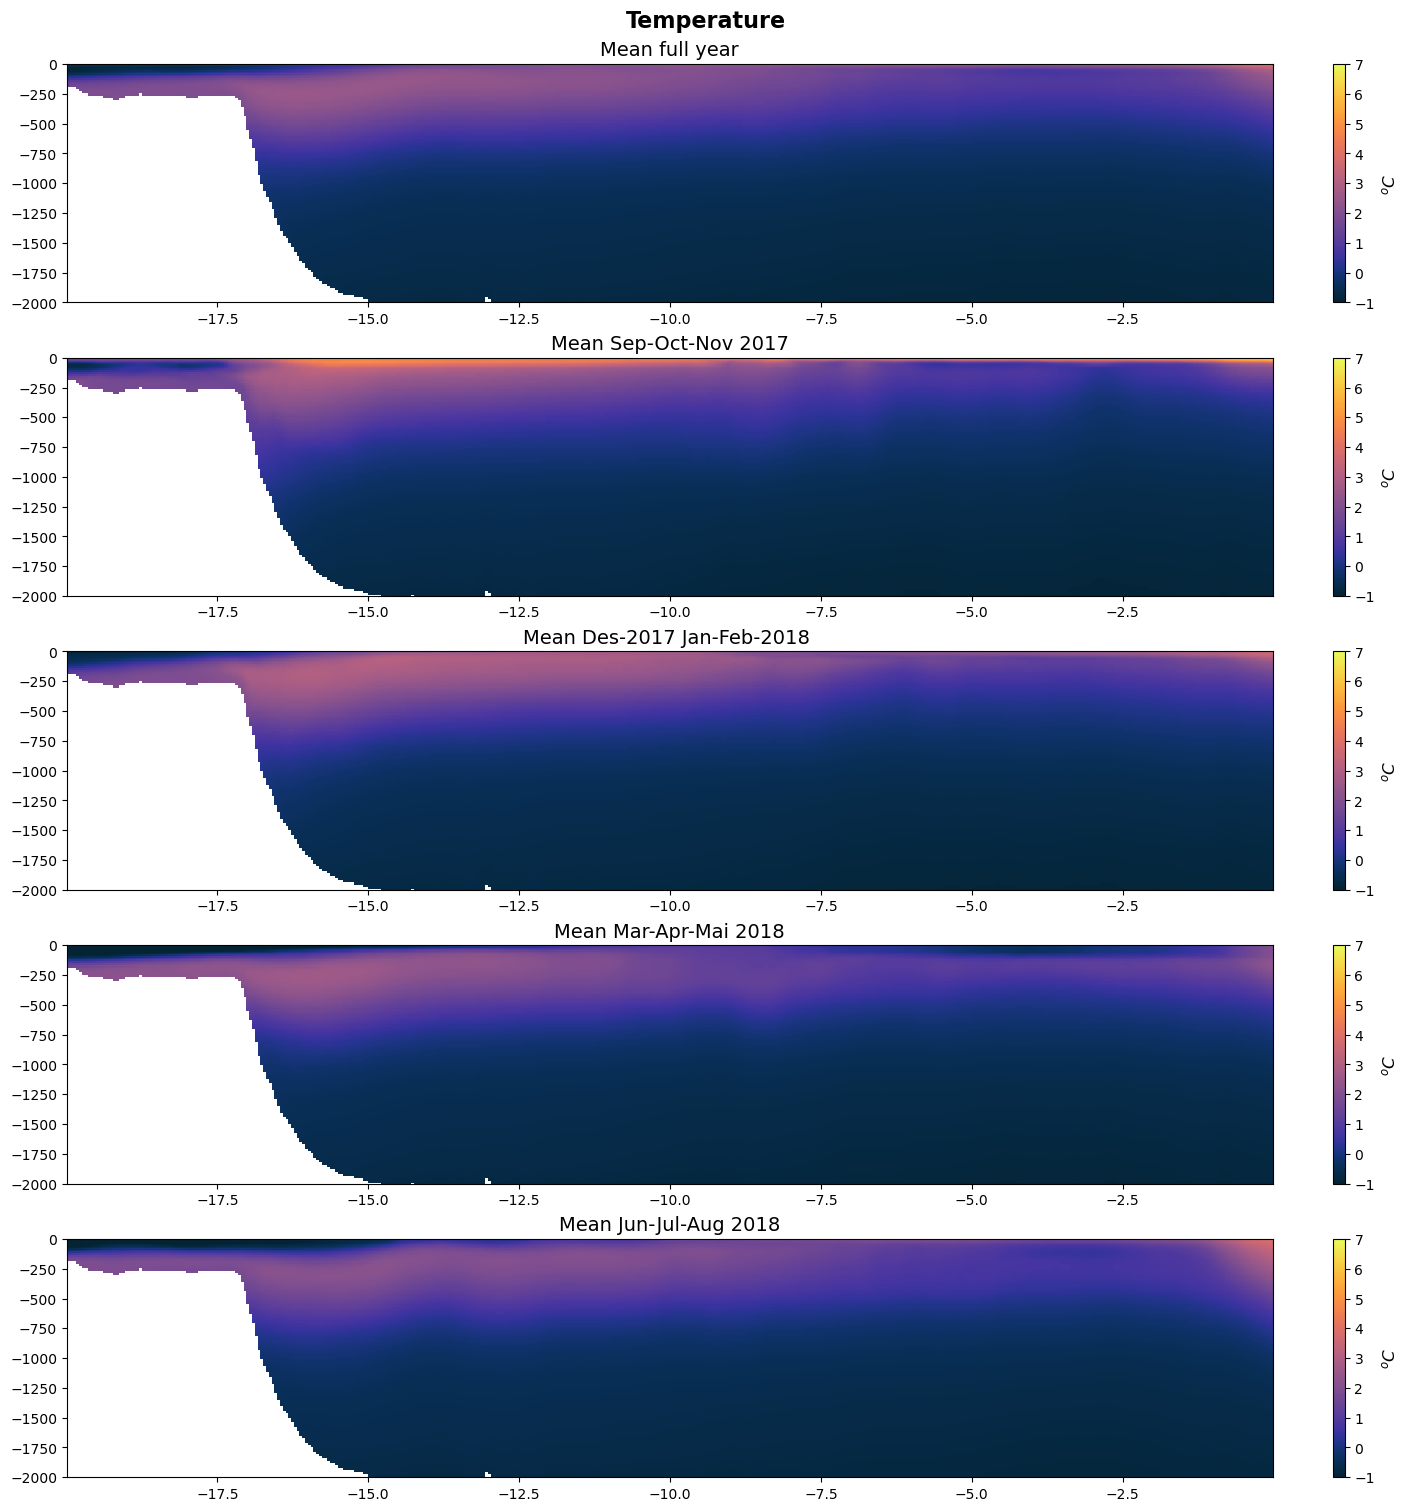

In [9]:
vertical_plot_3M_M(T_3Month,T_Mean,cmo.thermal,'Temperature','Temperature3MYear',vmin=-1,vmax=7,cbarName='$^oC$',set_depth=-2000)

In [10]:
V = df['V'].sel(Yp1=72.6,method='nearest')
V_3Month = V.resample(time='3ME').mean(dim='time')
V_Mean = V.mean(dim='time')

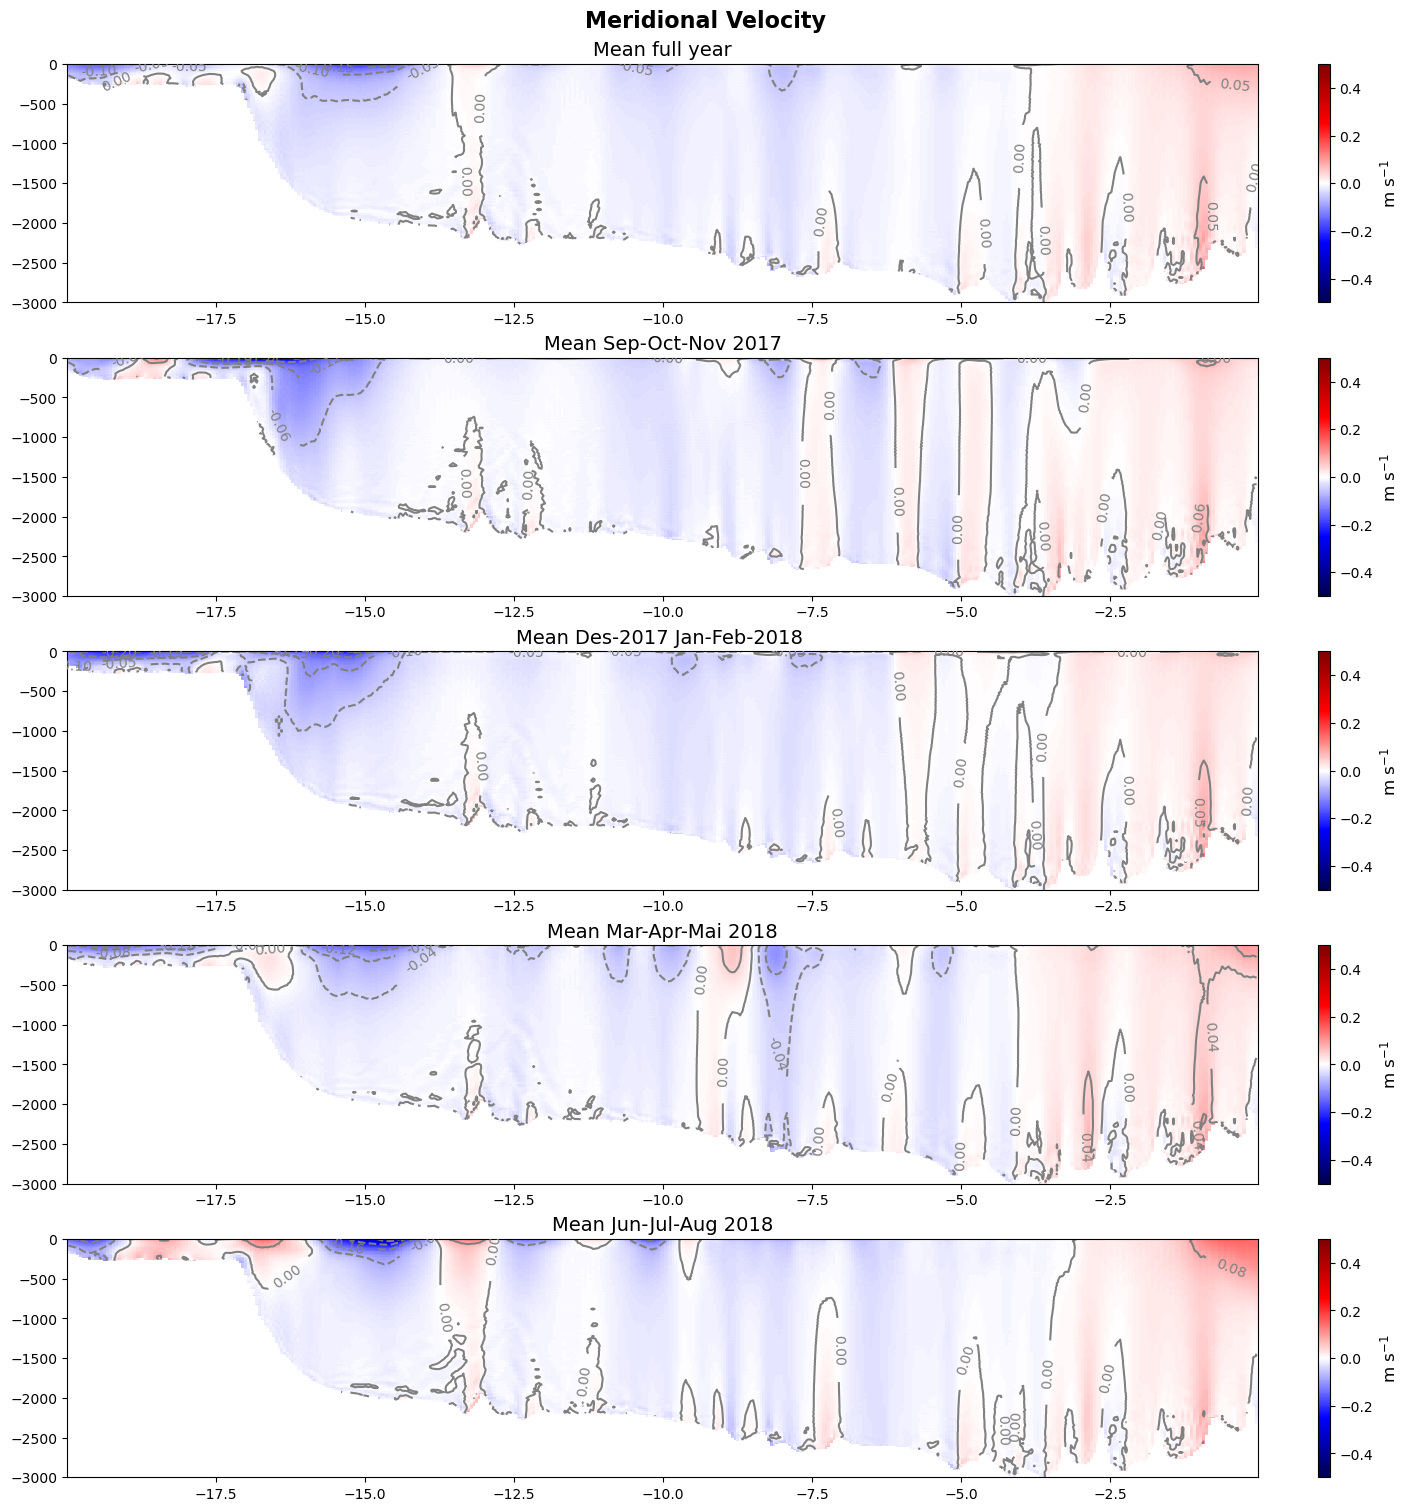

In [11]:
vertical_plot_3M_M(V_3Month,V_Mean,'seismic','Meridional Velocity','MeridionalVelocity3MYear',vmin=-0.5,vmax=0.5,cbarName='m s$^{-1}$',set_depth=-3000,addcontour=True)

In [12]:
od = ospy.OceanDataset(df)

In [13]:
od = od.compute.potential_density_anomaly()

Computing potential density anomaly using the following parameters: {'eq_state': 'mdjwf'}.


In [14]:
Sigma0 = od['Sigma0'].sel(Y=72.58998644,method='nearest')

In [15]:
display(Sigma0)

<xarray.DataArray 'Sigma0' (time: 1460, Z: 216, X: 435)>
array([[[24.69399072, 24.69860031, 24.70474692, ..., 27.08957845,
         27.08227029, 27.06791237],
        [24.69415511, 24.69871536, 24.70462679, ..., 27.08941699,
         27.0817694 , 27.06742987],
        [24.6951233 , 24.69983008, 24.70501482, ..., 27.09007848,
         27.08181076, 27.06758701],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[24.7286983 , 24.72742278, 24.72029823, ..., 27.09273919,
         27.08939648, 27.08251313],
        [24.72920622, 24.72854156, 24.72166958, ..., 27.09285145,
         27.08939982, 27.08238171],
        [24.73106463, 24.73162403, 24.7258221 , ..., 27.0934694 ,
         27.08981217, 27.0824879 ],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[25.1083239 , 25.12588667, 25.14766338, ..., 26.99952109,
         26.99331732, 26.98621227],
        [25.12919081, 25.14602843, 25.16624945, ..., 27.00063654,
         26.99440461, 26.9872666 ],
        [25.17352131, 25.18373878, 25.19677154, ..., 27.00155673,
         26.99526943, 26.98808658],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * Z        (Z) float64 -1.0 -3.5 -7.0 ... -3.904e+03 -3.922e+03 -3.942e+03
  * X        (X) float64 -19.97 -19.92 -19.87 ... -0.1493 -0.09658 -0.04373
    Y        float64 72.59
    XC       (X) float64 ...
    YC       (X) float64 ...
  * time     (time) datetime64[ns] 2017-09-01 ... 2018-08-31T18:00:00
Attributes:
    units:                kg/m^3
    long_name:            potential density anomaly
    OceanSpy_parameters:  {'eq_state': 'mdjwf'}

In [16]:
rho_3Month = Sigma0.resample(time='3ME').mean(dim='time')
rho_Mean = Sigma0.mean(dim='time')

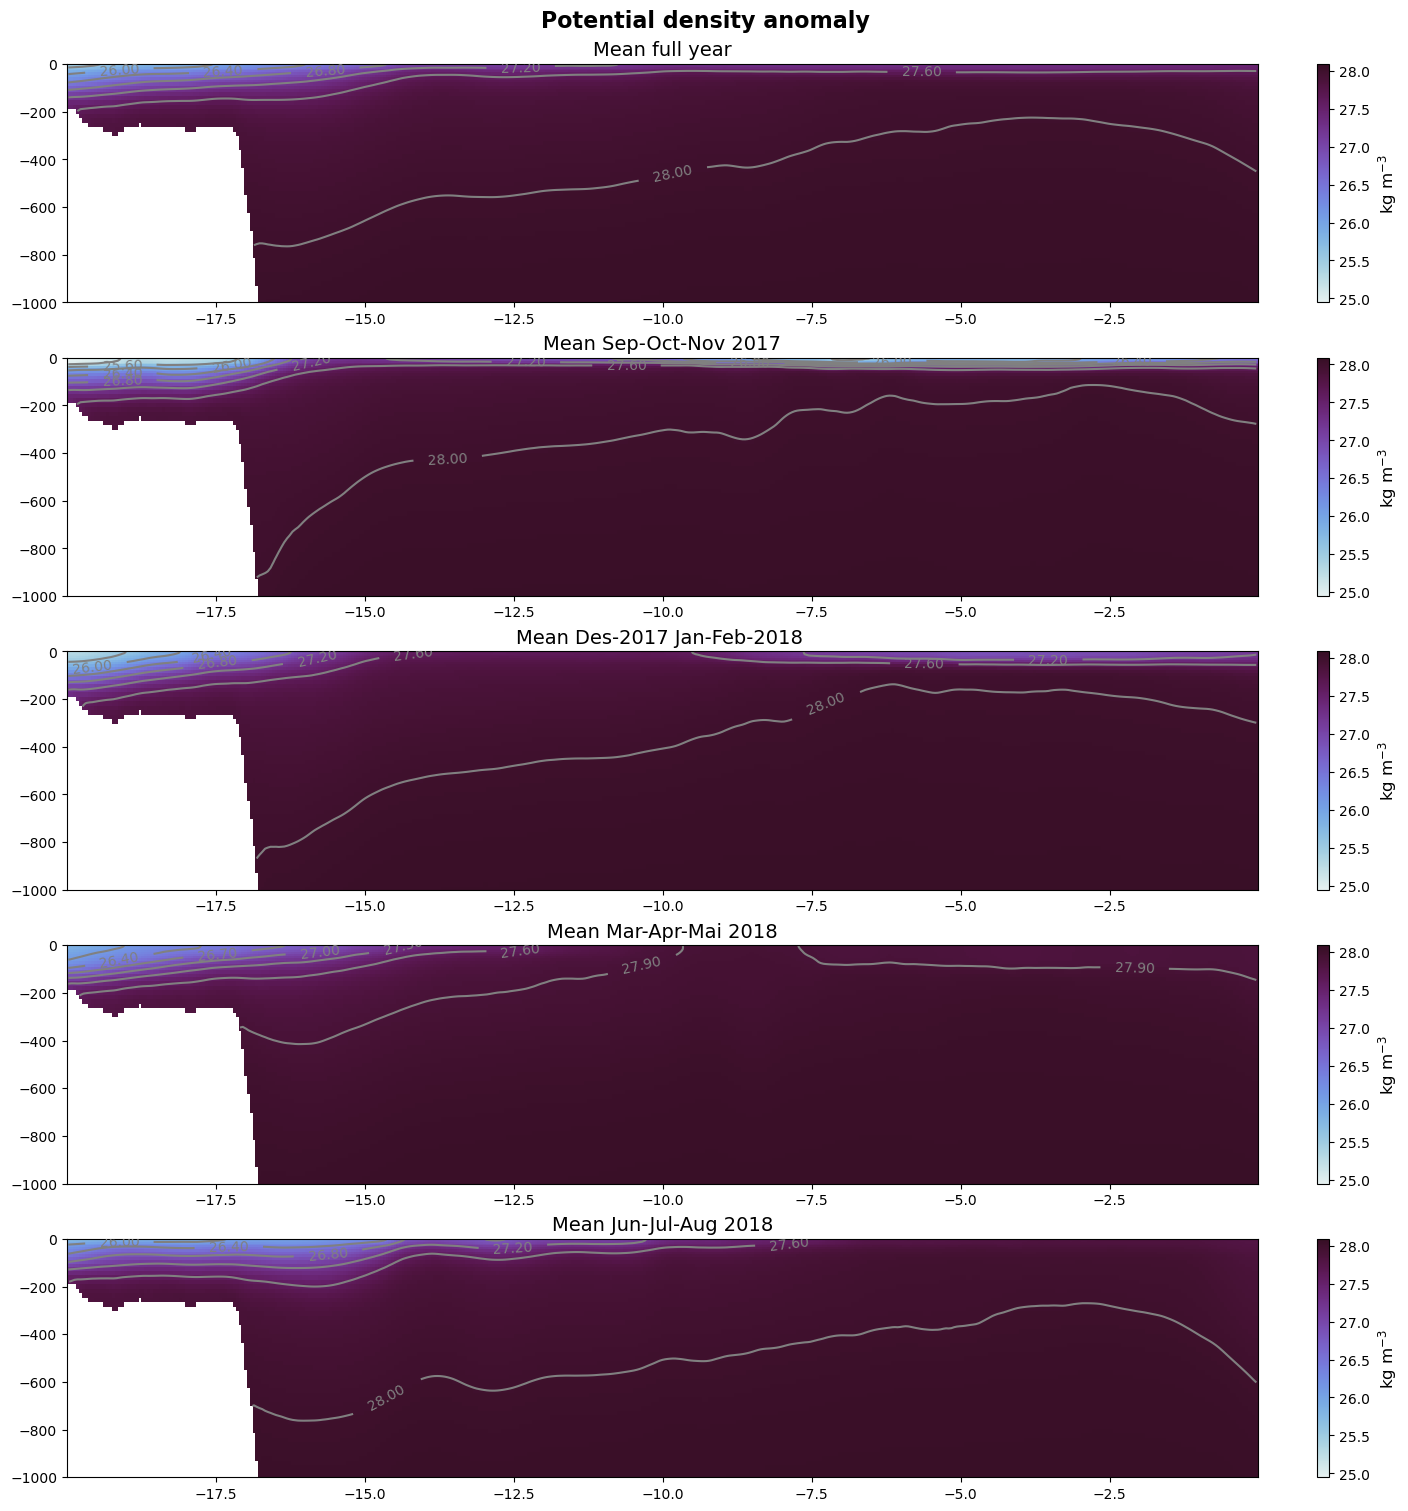

In [17]:
vertical_plot_3M_M(rho_3Month,rho_Mean,cmap=cmo.dense,
                   plotName='Potential density anomaly',
                   fileName='PotentialDensityAnom3MYear',
                   vmin=np.min(rho_3Month),vmax=np.max(rho_3Month),
                   cbarName='kg m$^{-3}$',set_depth=-1000,addcontour=True)

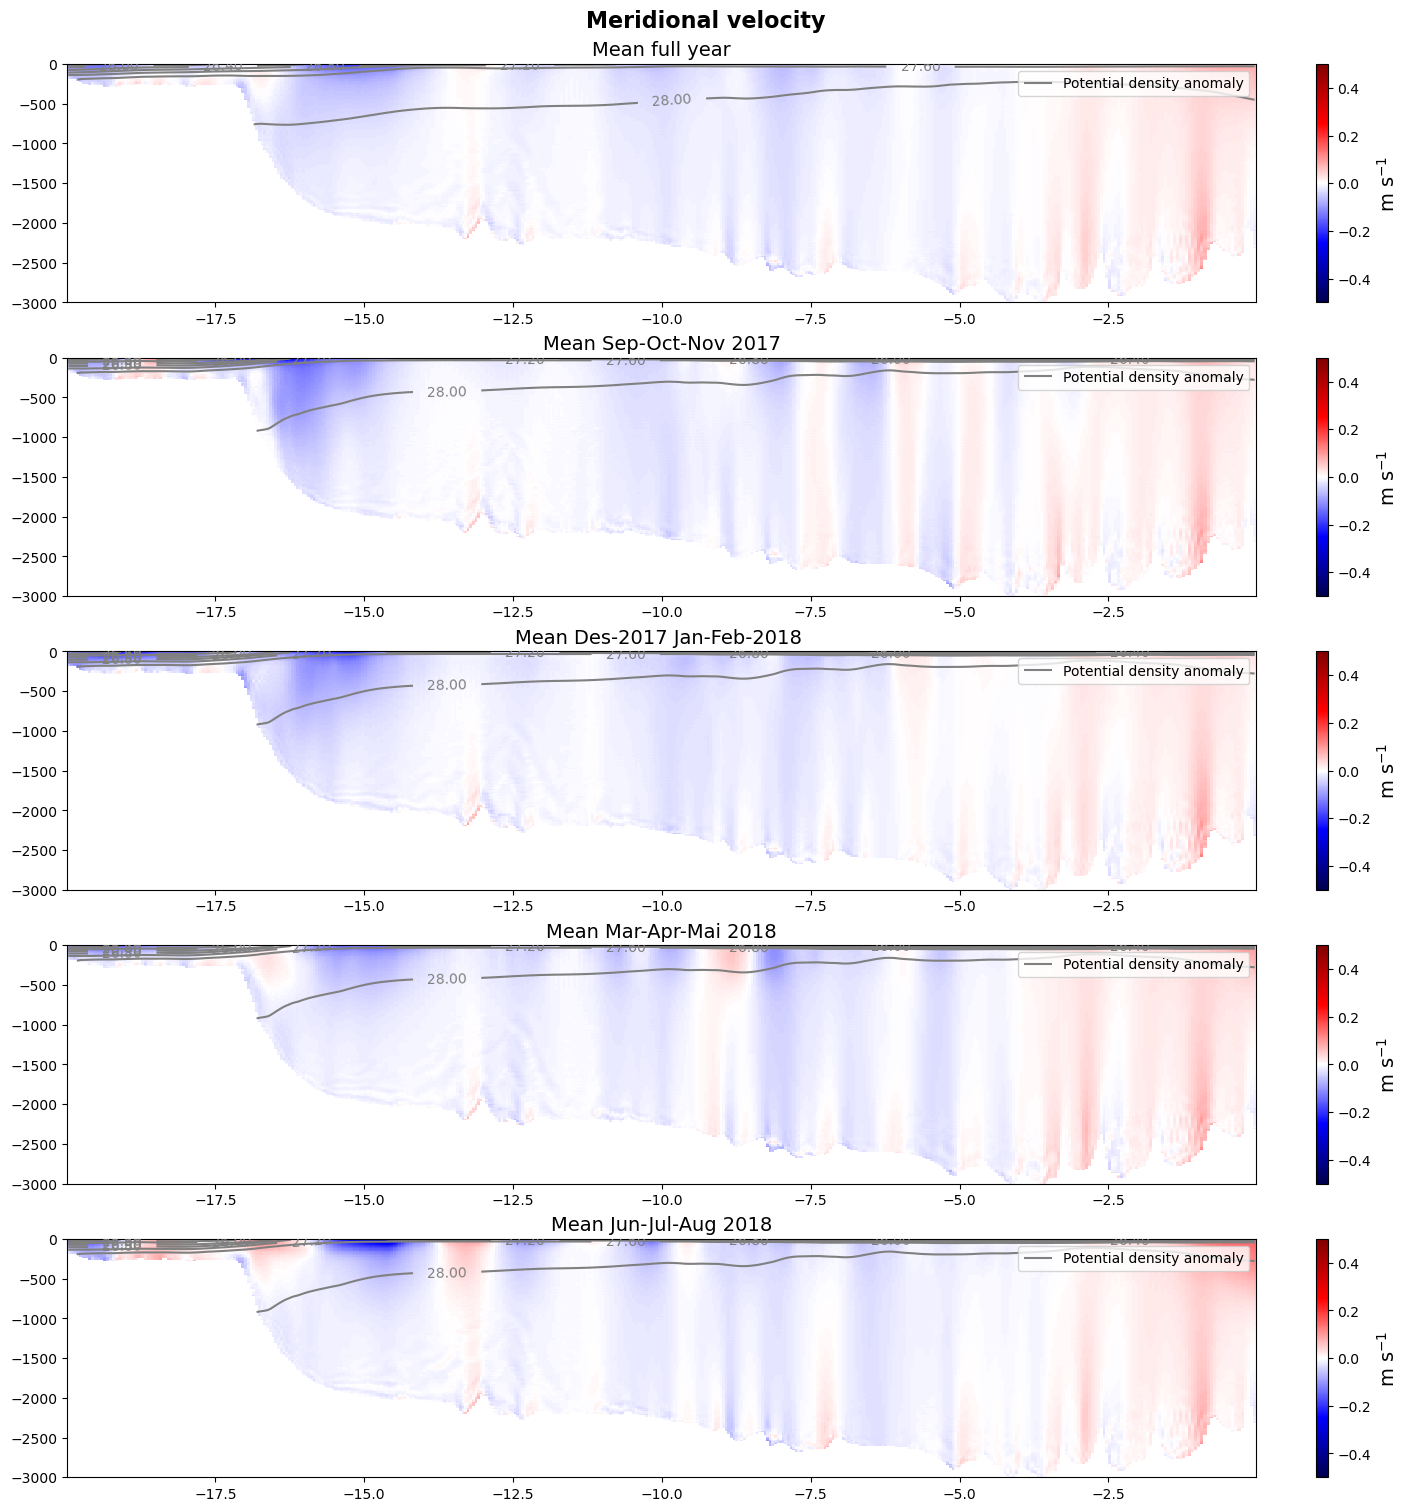

In [42]:
# Plot meridional velocity with density contour
data3M = V_3Month
dataM = V_Mean
cmap = 'seismic'
Name = 'Salinity'
vmin = -0.5
vmax = 0.5
cntrData3M = rho_3Month
cntrDataM = rho_Mean
set_depth = -3000
Name = 'Meridional velocity'
fileName = 'MeridionalVelocity3MDensityAnom'
cbarName = 'm s$^{-1}$'


# Function Mercator transform
def forward(a):
    a = np.deg2rad(a)
    return np.rad2deg(np.log(np.abs(np.tan(a) + 1.0 / np.cos(a))))


def inverse(a):
    a = np.deg2rad(a)
    return np.rad2deg(np.arctan(np.sinh(a)))


fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(14,15),layout='constrained')

# Mean full year
mesh1 = ax1.pcolormesh(dataM.X,dataM.Z,dataM,cmap=cmap,vmin=vmin,vmax=vmax)
cbar1 = fig.colorbar(mesh1)
cbar1.set_label(cbarName,fontsize=14)
cntr = ax1.contour(cntrDataM.X,cntrDataM.Z,cntrDataM,colors='grey')
ax1.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax1.set_title('Mean full year',fontsize=14)
ax1.set_ylim(set_depth,0)
h1, _ = cntr.legend_elements()
ax1.legend([h1[0]], ['Potential density anomaly'])

# Sep-Oct-Nov
mesh2 = ax2.pcolormesh(data3M.X,data3M.Z,data3M[0],cmap=cmap,vmin=vmin,vmax=vmax)
cbar2 = fig.colorbar(mesh2)
cbar2.set_label(cbarName,fontsize=14)
cntr = ax2.contour(cntrData3M.X,cntrData3M.Z,cntrData3M[0],colors='grey')
ax2.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax2.set_title('Mean Sep-Oct-Nov 2017',fontsize=14)
ax2.set_ylim(set_depth,0)
h1, _ = cntr.legend_elements()
ax2.legend([h1[0]], ['Potential density anomaly'])

# Des-Jan-Feb
mesh3 = ax3.pcolormesh(data3M.X,data3M.Z,data3M[1],cmap=cmap,vmin=vmin,vmax=vmax)
cbar3 = fig.colorbar(mesh3)
cbar3.set_label(cbarName,fontsize=14)
cntr = ax3.contour(cntrData3M.X,cntrData3M.Z,cntrData3M[0],colors='grey')
ax3.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax3.set_title('Mean Des-2017 Jan-Feb-2018 ',fontsize=14)
ax3.set_ylim(set_depth,0)
h1, _ = cntr.legend_elements()
ax3.legend([h1[0]], ['Potential density anomaly'])

# Mar-Apr-Mai
mesh4 = ax4.pcolormesh(data3M.X,data3M.Z,data3M[2],cmap=cmap,vmin=vmin,vmax=vmax)
cbar4 = fig.colorbar(mesh4)
cbar4.set_label(cbarName,fontsize=14)
cntr = ax4.contour(cntrData3M.X,cntrData3M.Z,cntrData3M[0],colors='grey')
ax4.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax4.set_title('Mean Mar-Apr-Mai 2018',fontsize=14)
ax4.set_ylim(set_depth,0)
h1, _ = cntr.legend_elements()
ax4.legend([h1[0]], ['Potential density anomaly'])

# Jun-Jul-Aug
mesh5 = ax5.pcolormesh(data3M.X,data3M.Z,data3M[3],cmap=cmap,vmin=vmin,vmax=vmax)
cbar5 = fig.colorbar(mesh5)
cbar5.set_label(cbarName,fontsize=14)
cntr = ax5.contour(cntrData3M.X,cntrData3M.Z,cntrData3M[0],colors='grey')
ax5.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax5.set_title('Mean Jun-Jul-Aug 2018',fontsize=14)
ax5.set_ylim(set_depth,0)
h1, _ = cntr.legend_elements()
ax5.legend([h1[0]], ['Potential density anomaly'])

fig.suptitle(Name,fontweight='bold',fontsize=16)
plt.savefig(f'C:/Users/eirik/Master/Figures/{fileName}')

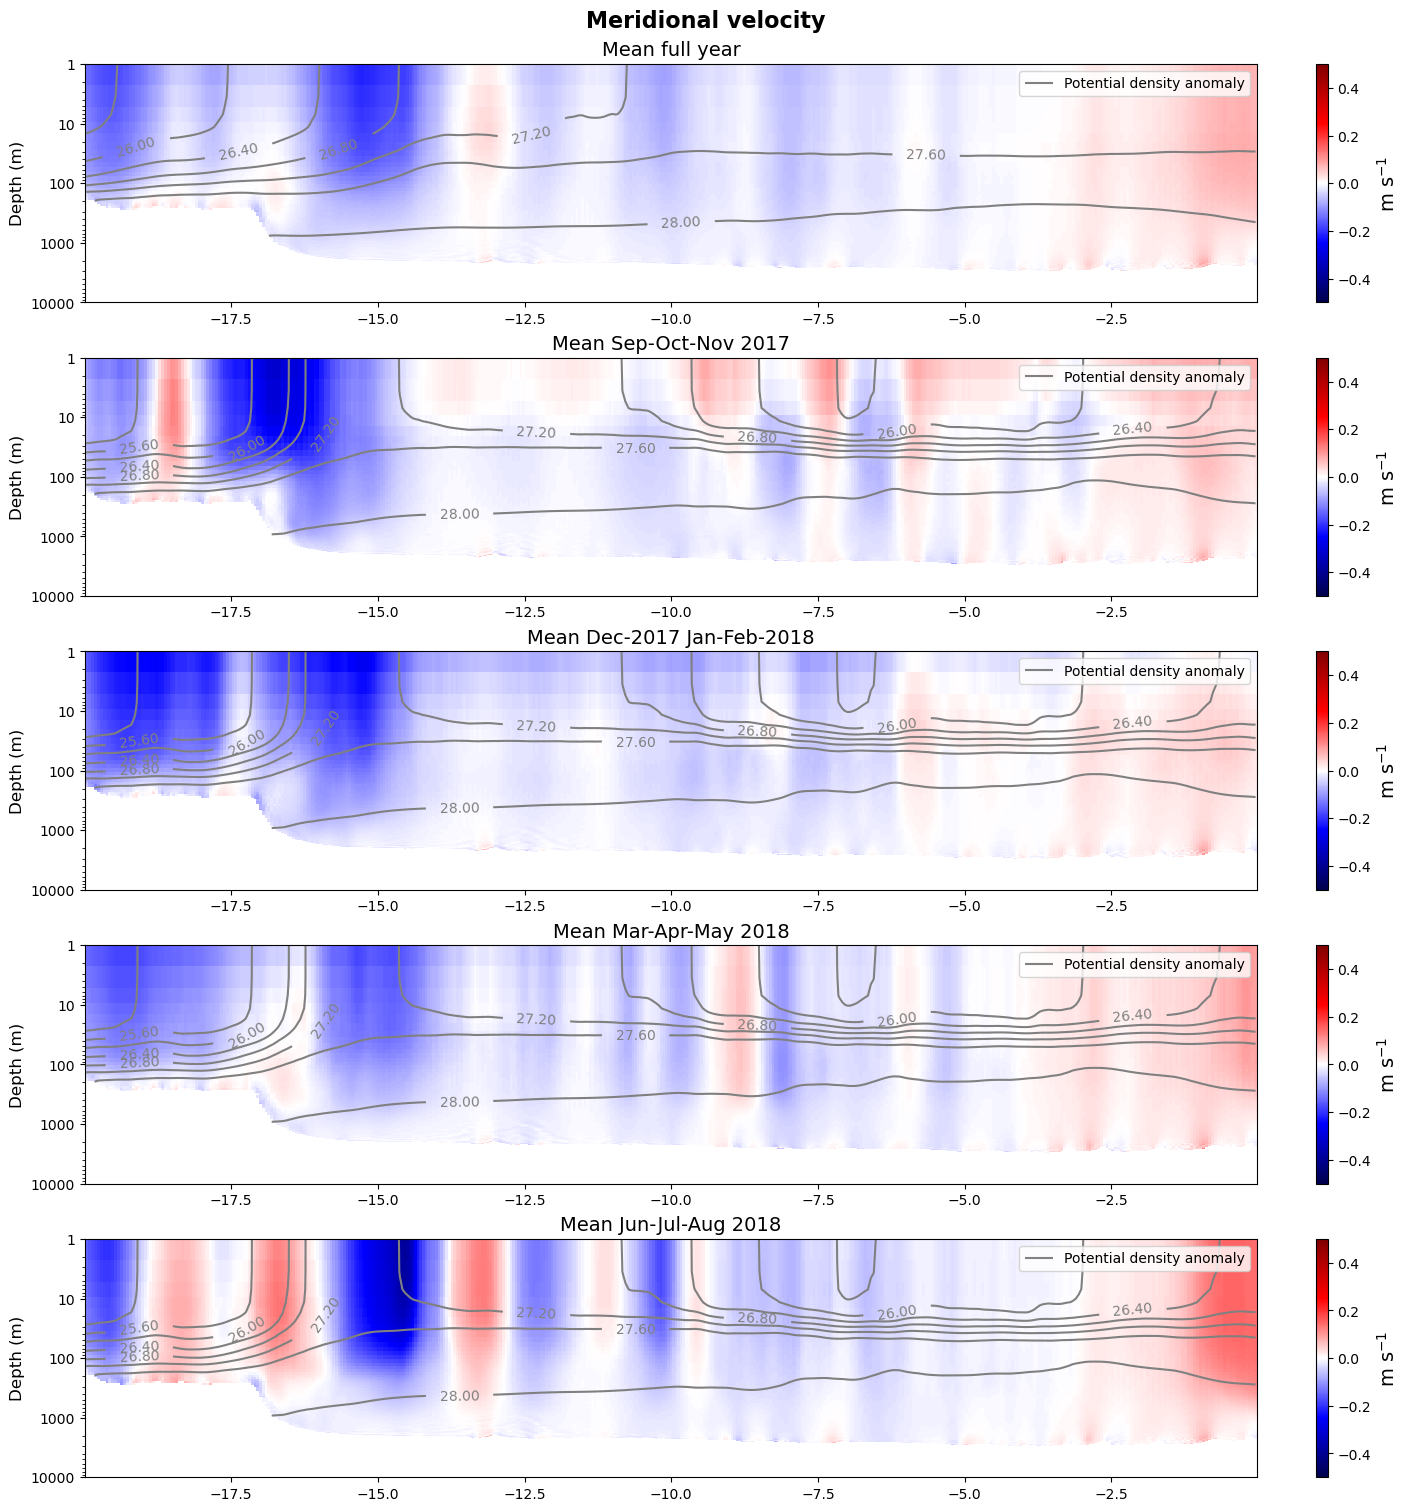

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, LogLocator, LogFormatter

# Your existing data and parameters
data3M = V_3Month
dataM = V_Mean
cmap = 'seismic'
Name = 'Salinity'
vmin = -0.5
vmax = 0.5
cntrData3M = rho_3Month
cntrDataM = rho_Mean
set_depth = -3000
Name = 'Meridional velocity'
fileName = 'MeridionalVelocity3MDensityAnom'
cbarName = 'm s$^{-1}$'

# Create subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(14, 15), layout='constrained')

# Function to apply logarithmic y-axis scale
def apply_log_yscale(ax):
    ax.set_yscale('log')
    ax.yaxis.set_minor_formatter(NullFormatter())
    ax.yaxis.set_major_locator(LogLocator(base=10.0, subs='auto', numticks=10))
    ax.yaxis.set_major_formatter(LogFormatter())
    ax.set_ylabel('Depth (m)', fontsize=12)
    ax.invert_yaxis()  # Invert the y-axis

    # Set y-ticks manually to ensure they are displayed
    y_ticks = [1, 10, 100, 1000, 10000]
    ax.set_yticks(y_ticks)
    ax.get_yaxis().set_major_formatter(LogFormatter())

# Mean full year
mesh1 = ax1.pcolormesh(dataM.X, -dataM.Z, dataM, cmap=cmap, vmin=vmin, vmax=vmax)
cbar1 = fig.colorbar(mesh1, ax=ax1)
cbar1.set_label(cbarName, fontsize=14)
cntr = ax1.contour(dataM.X, -dataM.Z, cntrDataM, colors='grey')
ax1.clabel(cntr, fmt="%2.2f", use_clabeltext=True)
ax1.set_title('Mean full year', fontsize=14)
ax1.set_ylim(1, -set_depth)  # Set y-axis limits to positive values
h1, _ = cntr.legend_elements()
ax1.legend([h1[0]], ['Potential density anomaly'])
apply_log_yscale(ax1)

# Sep-Oct-Nov
mesh2 = ax2.pcolormesh(data3M.X, -data3M.Z, data3M[0], cmap=cmap, vmin=vmin, vmax=vmax)
cbar2 = fig.colorbar(mesh2, ax=ax2)
cbar2.set_label(cbarName, fontsize=14)
cntr = ax2.contour(data3M.X, -data3M.Z, cntrData3M[0], colors='grey')
ax2.clabel(cntr, fmt="%2.2f", use_clabeltext=True)
ax2.set_title('Mean Sep-Oct-Nov 2017', fontsize=14)
ax2.set_ylim(1, -set_depth)  # Set y-axis limits to positive values
h1, _ = cntr.legend_elements()
ax2.legend([h1[0]], ['Potential density anomaly'])
apply_log_yscale(ax2)

# Dec-Jan-Feb
mesh3 = ax3.pcolormesh(data3M.X, -data3M.Z, data3M[1], cmap=cmap, vmin=vmin, vmax=vmax)
cbar3 = fig.colorbar(mesh3, ax=ax3)
cbar3.set_label(cbarName, fontsize=14)
cntr = ax3.contour(data3M.X, -data3M.Z, cntrData3M[0], colors='grey')
ax3.clabel(cntr, fmt="%2.2f", use_clabeltext=True)
ax3.set_title('Mean Dec-2017 Jan-Feb-2018', fontsize=14)
ax3.set_ylim(1, -set_depth)  # Set y-axis limits to positive values
h1, _ = cntr.legend_elements()
ax3.legend([h1[0]], ['Potential density anomaly'])
apply_log_yscale(ax3)

# Mar-Apr-May
mesh4 = ax4.pcolormesh(data3M.X, -data3M.Z, data3M[2], cmap=cmap, vmin=vmin, vmax=vmax)
cbar4 = fig.colorbar(mesh4, ax=ax4)
cbar4.set_label(cbarName, fontsize=14)
cntr = ax4.contour(data3M.X, -data3M.Z, cntrData3M[0], colors='grey')
ax4.clabel(cntr, fmt="%2.2f", use_clabeltext=True)
ax4.set_title('Mean Mar-Apr-May 2018', fontsize=14)
ax4.set_ylim(1, -set_depth)  # Set y-axis limits to positive values
h1, _ = cntr.legend_elements()
ax4.legend([h1[0]], ['Potential density anomaly'])
apply_log_yscale(ax4)

# Jun-Jul-Aug
mesh5 = ax5.pcolormesh(data3M.X, -data3M.Z, data3M[3], cmap=cmap, vmin=vmin, vmax=vmax)
cbar5 = fig.colorbar(mesh5, ax=ax5)
cbar5.set_label(cbarName, fontsize=14)
cntr = ax5.contour(data3M.X, -data3M.Z, cntrData3M[0], colors='grey')
ax5.clabel(cntr, fmt="%2.2f", use_clabeltext=True)
ax5.set_title('Mean Jun-Jul-Aug 2018', fontsize=14)
ax5.set_ylim(1, -set_depth)  # Set y-axis limits to positive values
h1, _ = cntr.legend_elements()
ax5.legend([h1[0]], ['Potential density anomaly'])
apply_log_yscale(ax5)

fig.suptitle(Name, fontweight='bold', fontsize=16)
plt.savefig(f'C:/Users/eirik/Master/Figures/{fileName}')
plt.show()

In [47]:
# Looking into eddy structures


In [56]:
df_OkuboWeiss = xr.open_dataset('C:/Users/eirik/Master/Data/new_dataset.nc')
df_eta = xr.open_dataset('C:/Users/eirik/Master/Data/Eta.nc')
df = xr.open_dataset('C:/Users/eirik/Master/Data/VerticalSection72_6.nc')

OW = df_OkuboWeiss['Okubo_Weiss']*(1/(10**(-9)))
eta = df_eta['Eta']

OW = OW.sel(time='2018-03-31T00:00:00.000000000')
OW = OW.sel(X=slice(-20,0))
OW = OW.sel(Y=slice(72,73))
OW = OW.sel(Z=-1)
eta = eta.sel(time='2018-03-31T00:00:00.000000000')
eta = eta.sel(X=slice(-20,0))
eta = eta.sel(Y=slice(72,73))

In [57]:
df = df.sel(time='2018-03-31T00:00:00.000000000')
display(df.Y.values)

array([72.58998644])

In [52]:
from detection import eddyDetection
Eddy_locations = eddyDetection(eta,OW)

Generating Frames: 100%|██████████| 39/39 [00:45<00:00,  1.17s/it]

Skiped windows %: 62.247042574911426


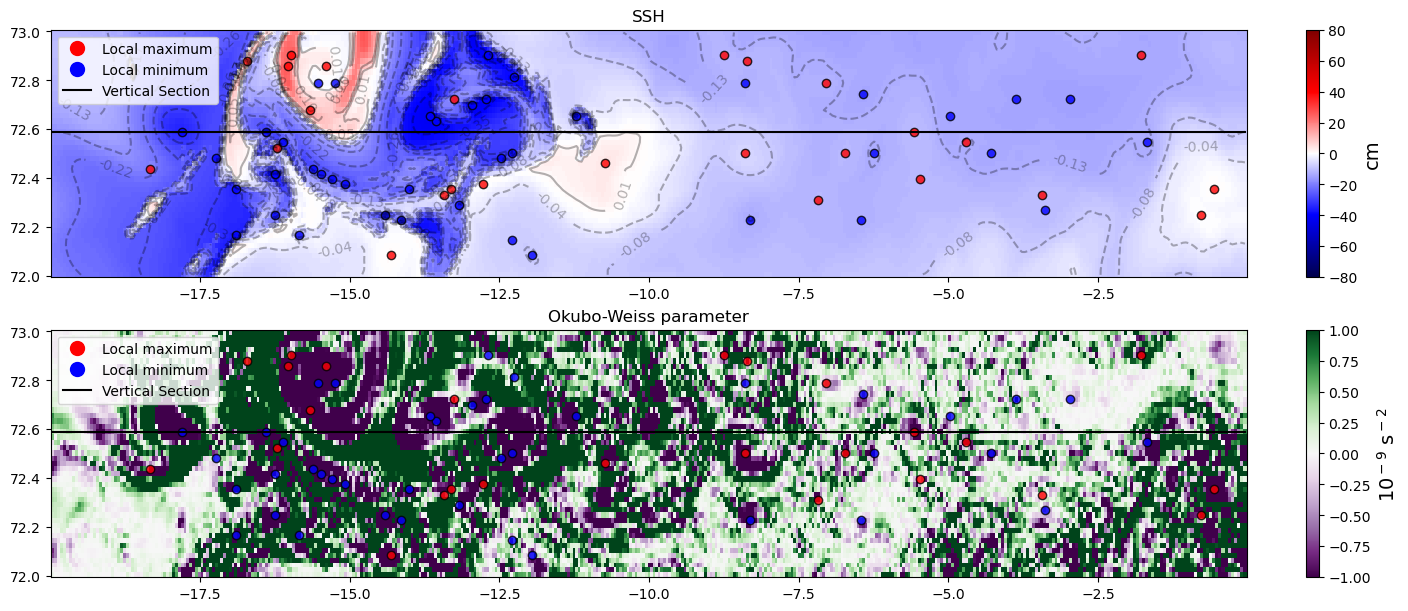

In [61]:
import matplotlib.lines as mlines

cmap = 'seismic'
fig, (ax1,ax2) = plt.subplots(2,1,figsize=[14,6],layout='constrained')

mesh = ax1.pcolormesh(eta.X,eta.Y,eta*100,cmap=cmap,vmin=-80,vmax=80)
cbar = fig.colorbar(mesh)
cbar.set_label('cm',fontsize=14)
cntr = ax1.contour(eta.X,eta.Y,eta,np.linspace(-0.4,0.1,12),colors='black',alpha=0.3)
ax1.clabel(cntr,fmt="%2.2f",use_clabeltext=True)

ax1.set_title('SSH')

for i in Eddy_locations[0]:
    sct1 = ax1.scatter(eta.X[i[1]],eta.Y[i[0]],color='red',edgecolor='black',alpha=0.8)

for i in Eddy_locations[1]:
    sct2 = ax1.scatter(eta.X[i[1]],eta.Y[i[0]],color='blue',edgecolor='black',alpha=0.8)


# Create custom legend handles using Line2D
red_circle = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Local maximum')
blue_circle = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Local minimum')

ax1.plot(eta.X,[72.58998644 for i in eta.X],color='black')
section_label = mlines.Line2D([],[],color='black', linestyle='-',markersize=10,label='Vertical Section')

# Add the legend to the plot
ax1.legend(handles=[red_circle, blue_circle,section_label])

cmap = 'PRGn'

mesh = ax2.pcolormesh(OW.X,OW.Y,OW,cmap=cmap,vmin=-1,vmax=1)
cbar = fig.colorbar(mesh)
cbar.set_label('10$^-$$^9$ s$^-$$^2$',fontsize=14)

ax2.set_title('Okubo-Weiss parameter')

for i in Eddy_locations[0]:
    sct1 = ax2.scatter(eta.X[i[1]],eta.Y[i[0]],color='red',edgecolor='black',alpha=0.8)

for i in Eddy_locations[1]:
    sct2 = ax2.scatter(eta.X[i[1]],eta.Y[i[0]],color='blue',edgecolor='black',alpha=0.8)


# Create custom legend handles using Line2D
red_circle = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Local maximum')
blue_circle = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Local minimum')

ax2.plot(eta.X,[72.58998644 for i in eta.X],color='black')
section_label = mlines.Line2D([],[],color='black', linestyle='-',markersize=10,label='Vertical Section')

# Add the legend to the plot
ax2.legend(handles=[red_circle, blue_circle,section_label])

In [69]:
warm_eddy = []
for i in Eddy_locations[0]:
    coord = [eta.X.values[i[1]],eta.Y.values[i[0]]]
    warm_eddy.append(coord)
display('Warm eddies',warm_eddy)

cold_eddy = []
for i in Eddy_locations[1]:
    coord = [eta.X.values[i[1]],eta.Y.values[i[0]]]
    cold_eddy.append(coord)
display('Cold eddies',cold_eddy)

'Warm eddies'

[[-14.313800109999987, 72.085415495],
 [-0.7744173149999991, 72.24951569],
 [-7.1729725499999955, 72.312062055],
 [-13.431002524999997, 72.333038035],
 [-3.438140434999995, 72.333038035],
 [-13.299394579999996, 72.35407868],
 [-0.5676155449999991, 72.35407868],
 [-12.774721725, 72.37518464499999],
 [-5.47569651, 72.39635658499999],
 [-18.329036350000003, 72.43890108],
 [-10.737527224999994, 72.460275],
 [-8.399611769999996, 72.503229675],
 [-6.7305882550000025, 72.503229675],
 [-16.208595360000007, 72.52481184999999],
 [-4.699427794999996, 72.54646488],
 [-5.566242255, 72.58998643999999],
 [-15.660415994999987, 72.67791276999999],
 [-13.255566809999996, 72.72233004],
 [-7.040532414999996, 72.78954182000001],
 [-16.025180735000006, 72.85747694999999],
 [-15.388542894999986, 72.85747694999999],
 [-16.716810075000005, 72.880286815],
 [-8.356052224999996, 72.880286815],
 [-15.979437100000007, 72.90318058999999],
 [-8.747566299999999, 72.90318058999999],
 [-1.7869474099999958, 72.9031805899

'Cold eddies'

[[-11.948644934999994, 72.085415495],
 [-12.295880854999997, 72.146506485],
 [-16.903092195000003, 72.166987675],
 [-15.842463365000006, 72.166987675],
 [-14.136416894999986, 72.228792005],
 [-8.312477104999996, 72.228792005],
 [-6.463825195000002, 72.228792005],
 [-16.254561210000006, 72.24951569],
 [-14.402661864999986, 72.24951569],
 [-3.3906583949999947, 72.27030151],
 [-13.167971574999996, 72.29115009],
 [-16.903092195000003, 72.35407868],
 [-14.003665869999987, 72.35407868],
 [-15.073069799999985, 72.37518464499999],
 [-15.298224914999984, 72.39635658499999],
 [-16.254561210000006, 72.41759517],
 [-15.479011914999987, 72.41759517],
 [-15.615005699999987, 72.43890108],
 [-17.2311137, 72.48171763],
 [-12.469800359999997, 72.48171763],
 [-12.295880854999997, 72.503229675],
 [-6.240689020000001, 72.503229675],
 [-4.283190514999996, 72.503229675],
 [-16.11679916500001, 72.54646488],
 [-1.687209394999996, 72.54646488],
 [-17.799872535000002, 72.58998643999999],
 [-16.39273505500001, 72

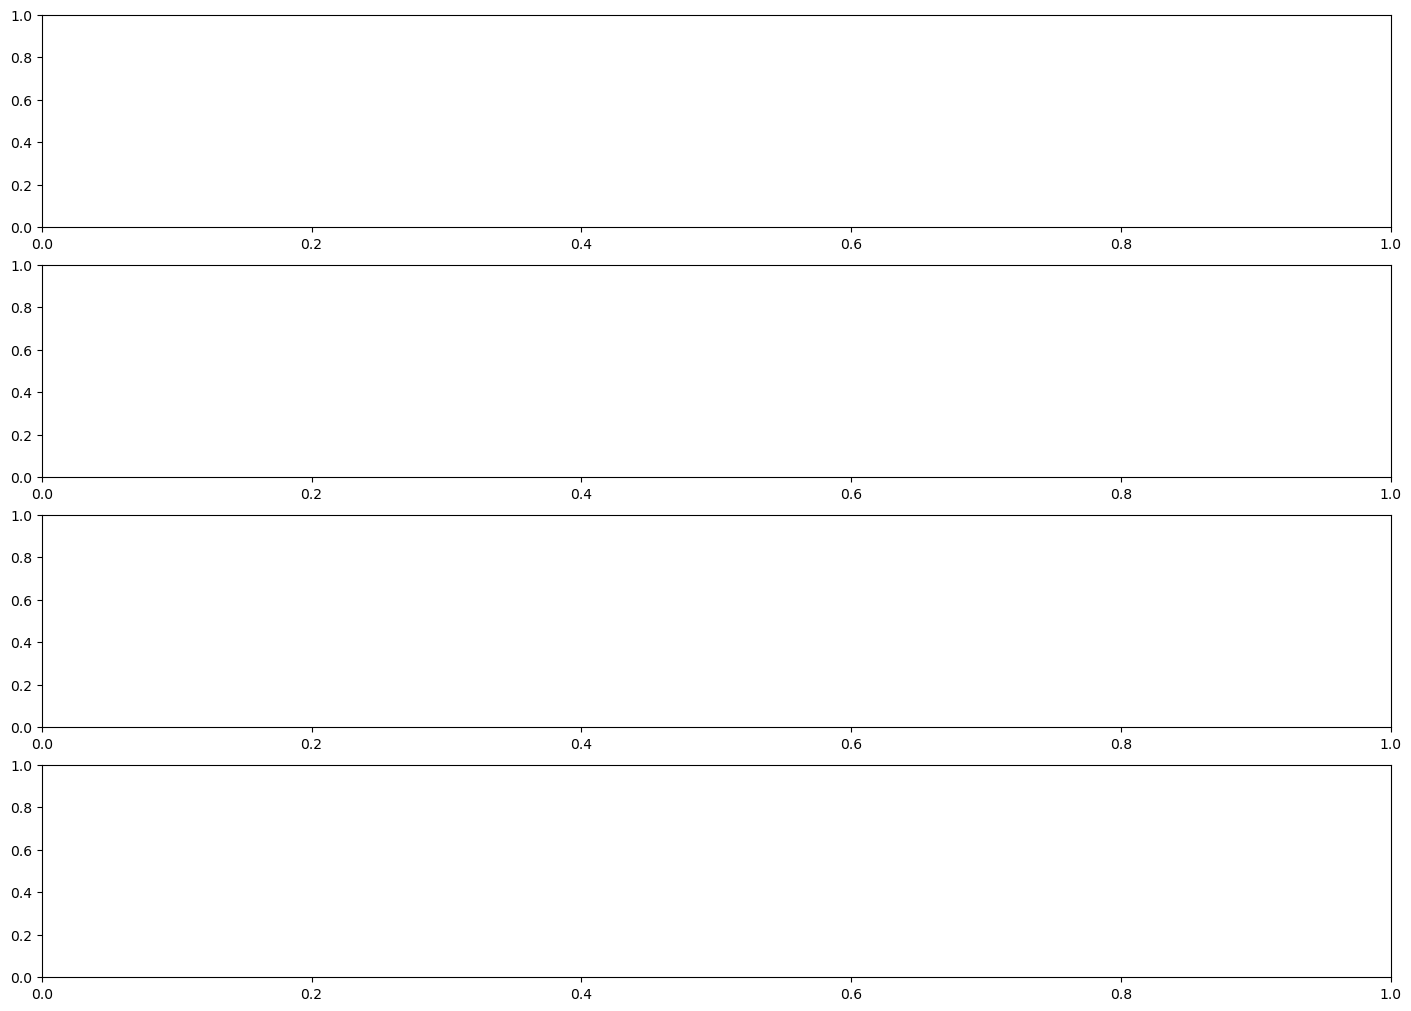

In [62]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(14,10),layout='constrained')